In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import tools
from tools import cmp

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/lustre/scratch117/cellgen/team297/kt16/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.20.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1


In [2]:
# read in the crowley data
adata = sc.read_h5ad('dataset/Chen/chen_11_filtered.h5ad')
adata

AnnData object with n_obs × n_vars = 41516 × 4624
    obs: 'barcode', 'study', 'sample', 'group', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'is_doublet', 'filter_rna', 'leiden', 'leiden_R', 'celltypes', 'celltypes_group'
    var: 'GeneID', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltypes_colors', 'celltypes_group_colors', 'hvg', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [2]:
mnp = sc.read_h5ad('dataset/Chen/chen_11_filtered_mnp_ingested.h5ad')
mnp

AnnData object with n_obs × n_vars = 9565 × 2939
    obs: 'barcode', 'study', 'sample', 'group', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'is_doublet', 'filter_rna', 'leiden', 'leiden_R', 'celltypes', 'celltype-immune'
    var: 'GeneID', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype-immune_colors', 'celltypes_colors', 'hvg', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'rep'

In [5]:
lymphoid = sc.read_h5ad('dataset/Chen/chen_11_filtered_lymphoid_annotated.h5ad')
lymphoid

AnnData object with n_obs × n_vars = 18269 × 4040
    obs: 'barcode', 'study', 'sample', 'group', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'is_doublet', 'filter_rna', 'leiden', 'leiden_R', 'celltypes'
    var: 'GeneID', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltypes_colors', 'hvg', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
epi = sc.read_h5ad('dataset/Chen/chen_11_filtered_epithelial_ingested.h5ad')
epi

AnnData object with n_obs × n_vars = 7132 × 20857
    obs: 'barcode', 'study', 'sample', 'group', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'is_doublet', 'filter_rna', 'leiden', 'leiden_R', 'celltypes', 'celltype'
    var: 'GeneID', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'celltypes_colors', 'hvg', 'leiden', 'leiden_R_colors', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap', 'rep'

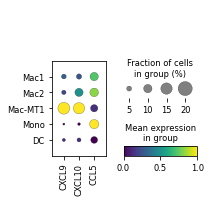

In [7]:
sc.pl.dotplot(mnp[~(mnp.obs['celltype-immune'] == 'Mac-cycling')], ['CXCL9', 'CXCL10', 'CCL5'], groupby = 'celltype-immune', standard_scale = 'var', color_map = 'viridis', save = '/chen_crpc-normal_mnp_dotplot.pdf')

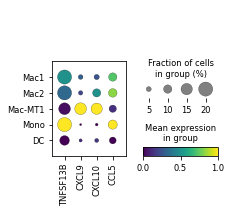

In [8]:
sc.pl.dotplot(mnp[~(mnp.obs['celltype-immune'] == 'Mac-cycling')], ['TNFSF13B', 'CXCL9', 'CXCL10', 'CCL5'], groupby = 'celltype-immune', standard_scale = 'var', color_map = 'viridis', dot_max = .2, save = '/chen_crpc-normal_mnp_dotplot.pdf')

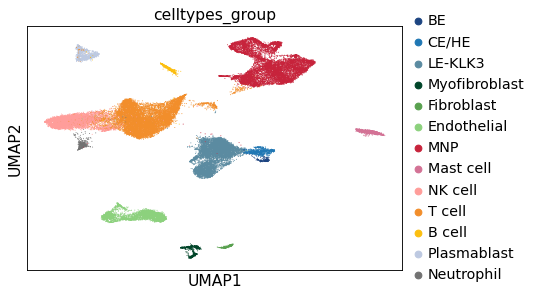

In [9]:
sc.set_figure_params(dpi_save=900, vector_friendly=True, figsize = (6,4))
sc.pl.umap(adata, color = 'celltypes_group', save = '/chen_crpc-normal_all_umap.pdf')

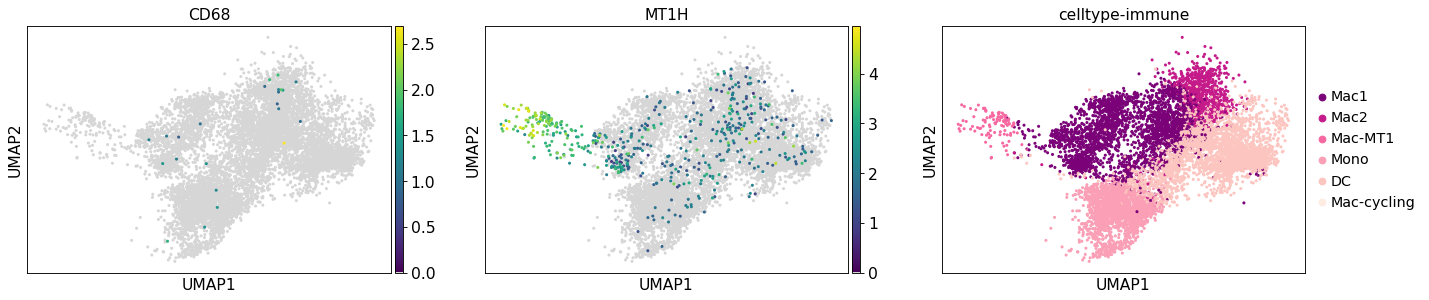

In [4]:
sc.set_figure_params(dpi_save=900, vector_friendly=True, figsize = (6,4))
sc.pl.umap(mnp, color = ['CD68', 'MT1H', 'celltype-immune'], color_map = cmp(), save = '/chen_crpc-normal_mnp_ingested_umap.pdf', size = 30)

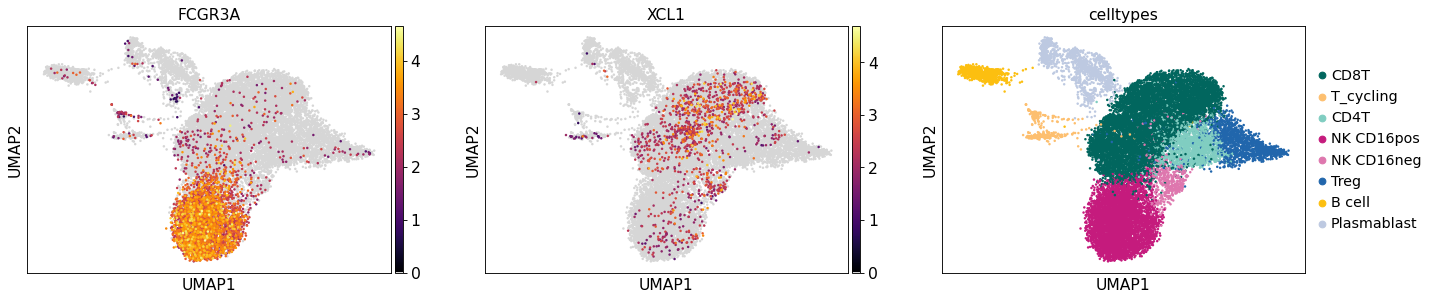

In [7]:
sc.pl.umap(lymphoid, color = ['FCGR3A', 'XCL1', 'celltypes'], color_map = cmp('inferno'), save = '/chen_crpc-normal_NK_umap.pdf', size = 20)

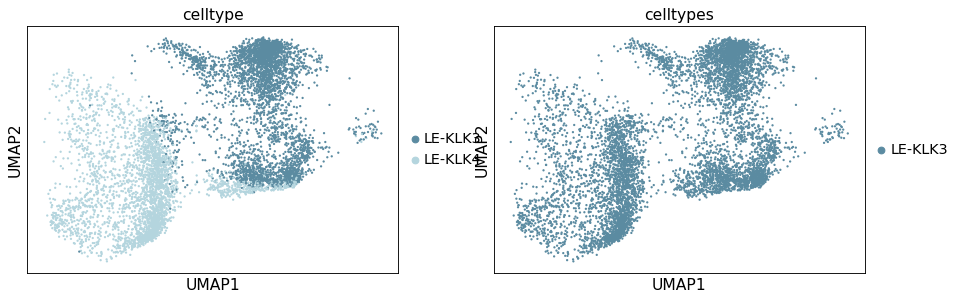

In [4]:
sc.set_figure_params(dpi_save=900, vector_friendly=True, figsize = (6,4))
sc.pl.umap(epi, color = ['celltype', 'celltypes'], save = '/chen_crpc-normal_epi_ingested.pdf')

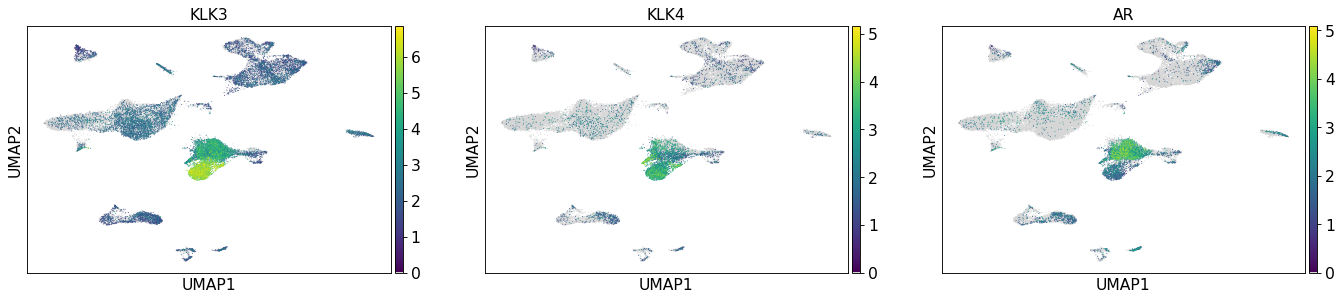

In [9]:
sc.set_figure_params(dpi_save=900, vector_friendly=True, figsize = (6,4))
sc.pl.umap(adata, color = ['KLK3', 'KLK4', 'AR'], color_map = cmp(), save = '/chen_crpc_KLK_umap.pdf')